In [130]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import ks_2samp,ttest_ind,mannwhitneyu

In [131]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4h/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4h/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [132]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,27,0.333333,0.000000,0,,0,,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,27,1.000000,0.000000,0,,0,,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,1,24,0.800000,0.201880,0,,0,,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,38,1.000000,0.000000,0,,0,,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,1,13,0.600000,0.361016,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,1,16,0.200000,0.187846,0,,0,,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,23,1.000000,0.000000,0,,0,,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,19,0.333333,0.000000,0,,0,,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,22,0.400000,0.000000,0,,0,,1.000000,NO


In [133]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'verbT', 'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [134]:
#train["entropia_total"]=train["entropias"]*train["entropia_total"]

array([<Axes: title={'center': 'entropias'}, xlabel='clases'>,
       <Axes: title={'center': 'entropia_total'}, xlabel='clases'>],
      dtype=object)

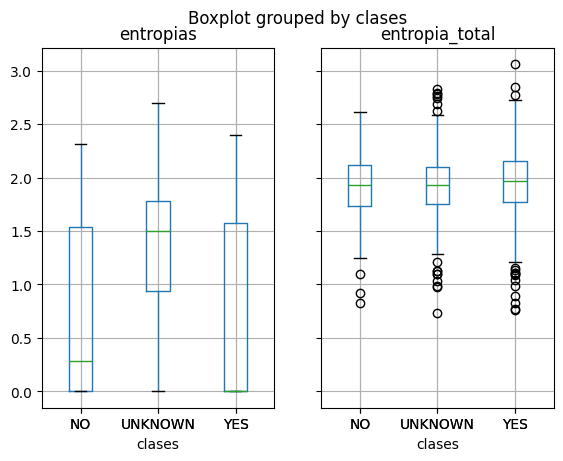

In [135]:
train.boxplot(by="clases",column=["entropias","entropia_total"])

array([<Axes: title={'center': 'mutinf'}, xlabel='clases'>,
       <Axes: title={'center': 'mutinf_t'}, xlabel='clases'>],
      dtype=object)

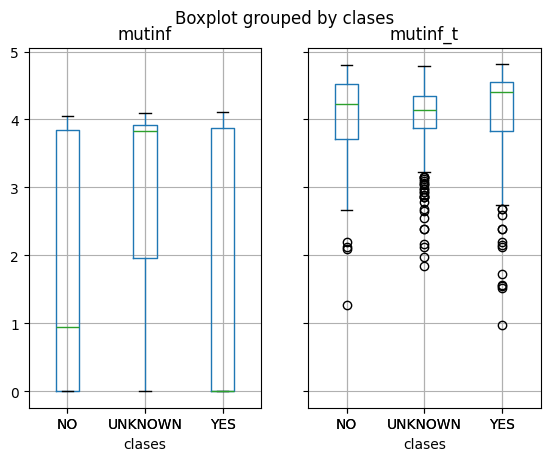

In [136]:
train.boxplot(by="clases",column=["mutinf","mutinf_t"])

# Integrar características

In [137]:
# train["mutinf"]=train["mutinf"]/train["mutinf_t"]
# train["max_info"]=train["max_info"]/train["max_info_t"]
# #train["mearts"]=train["mearts"]/train["mearts_t"]
# #train["entropias"]=train["entropias"]/train["entropia_total"]
# train["sumas"]=train["sumas"]/train["sumas_t"]
# train["list_m"]=train["list_m"]/train["list_M"]
# train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
#                   "mearts_t","sumas_t","list_M"],axis=1)

In [138]:
# train["mearts"]=train["mearts"]*train["distancias"]
# train=train.drop(["distancias","list_incomp","negH","max_info",'contra','neutral','list_comp','list_T','negT'],axis=1)

In [139]:
train=train.drop(["verbT","verbH"],axis=1)

In [140]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [141]:
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

No hay evidencia de una diferencia significativa entre los grupos. entropia_total
No hay evidencia de una diferencia significativa entre los grupos. mutinf_t
No hay evidencia de una diferencia significativa entre los grupos. contra
No hay evidencia de una diferencia significativa entre los grupos. list_comp
No hay evidencia de una diferencia significativa entre los grupos. list_incomp
No hay evidencia de una diferencia significativa entre los grupos. list_M
No hay evidencia de una diferencia significativa entre los grupos. list_T
No hay evidencia de una diferencia significativa entre los grupos. negT
No hay evidencia de una diferencia significativa entre los grupos. negH


In [142]:
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba k2 de dos muestras independientes
    stat, p_valor = ks_2samp(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

No hay evidencia de una diferencia significativa entre los grupos. entropia_total
No hay evidencia de una diferencia significativa entre los grupos. contra
No hay evidencia de una diferencia significativa entre los grupos. neutral
No hay evidencia de una diferencia significativa entre los grupos. rel_conceptuales
No hay evidencia de una diferencia significativa entre los grupos. list_comp
No hay evidencia de una diferencia significativa entre los grupos. list_incomp
No hay evidencia de una diferencia significativa entre los grupos. list_M
No hay evidencia de una diferencia significativa entre los grupos. list_T
No hay evidencia de una diferencia significativa entre los grupos. negT
No hay evidencia de una diferencia significativa entre los grupos. negH


In [143]:
from scipy.stats import mannwhitneyu

for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba mannwhitneyu de dos muestras independientes
    stat, p_valor = mannwhitneyu(grupo_a, grupo_b, use_continuity=False)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

No hay evidencia de una diferencia significativa entre los grupos. entropia_total
No hay evidencia de una diferencia significativa entre los grupos. contra
No hay evidencia de una diferencia significativa entre los grupos. list_comp
No hay evidencia de una diferencia significativa entre los grupos. list_incomp
No hay evidencia de una diferencia significativa entre los grupos. list_M
No hay evidencia de una diferencia significativa entre los grupos. list_T
No hay evidencia de una diferencia significativa entre los grupos. negT
No hay evidencia de una diferencia significativa entre los grupos. negH


## Eliminar características

In [144]:
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0.000000,3,0,27,0.333333,0.000000,0,0,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0.000000,5,0,27,1.000000,0.000000,0,0,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,0.721928,5,1,24,0.800000,0.201880,0,0,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0.000000,4,0,38,1.000000,0.000000,0,0,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,0.721928,5,1,13,0.600000,0.361016,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,0.721928,5,1,16,0.200000,0.187846,0,0,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0.000000,9,0,23,1.000000,0.000000,0,0,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0.000000,3,0,19,0.333333,0.000000,0,0,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0.000000,5,0,22,0.400000,0.000000,0,0,1.000000,NO


In [145]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [146]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [147]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,1.000000,0.073685,0.922306,0.972109,0.658321,0.754496,0.722219,0.044628,0.513249,-0.440830,...,-0.002841,0.767201,0.117843,0.619294,-0.079902,-0.374003,0.557441,-0.033269,0.031432,-0.311429
entropia_total,0.073685,1.000000,0.128389,0.064578,0.041460,0.127134,0.191606,0.677205,-0.012829,0.505977,...,-0.025052,0.012690,0.124304,-0.067585,-0.033998,0.045180,0.110827,0.073998,0.004959,0.076176
entropias,0.922306,0.128389,1.000000,0.958850,0.531005,0.899202,0.863431,0.026987,0.429844,-0.399353,...,0.001450,0.766460,0.113331,0.628259,-0.058046,-0.373287,0.488779,-0.017698,0.053972,-0.303298
mutinf,0.972109,0.064578,0.958850,1.000000,0.540691,0.833596,0.771584,0.041811,0.416550,-0.428230,...,-0.012993,0.770267,0.105266,0.616598,-0.044807,-0.366821,0.520190,-0.029875,0.043780,-0.300830
mearts,0.658321,0.041460,0.531005,0.540691,1.000000,0.426005,0.398846,-0.051678,0.738250,-0.301984,...,0.055089,0.510247,0.091639,0.425791,-0.065782,-0.246527,0.547916,-0.042594,0.005689,-0.238055
max_info,0.754496,0.127134,0.899202,0.833596,0.426005,1.000000,0.885003,0.019927,0.324505,-0.259115,...,-0.019388,0.638446,0.060723,0.492649,0.005058,-0.294122,0.446484,-0.007506,0.080037,-0.236879
sumas,0.722219,0.191606,0.863431,0.771584,0.398846,0.885003,1.000000,0.046052,0.302852,-0.228209,...,-0.014169,0.602071,0.069487,0.442829,-0.140913,-0.273572,0.464553,-0.000306,0.065388,-0.209880
mutinf_t,0.044628,0.677205,0.026987,0.041811,-0.051678,0.019927,0.046052,1.000000,-0.168912,0.717906,...,-0.054393,-0.094277,0.140210,-0.139956,0.080685,0.134337,-0.025316,0.067396,-0.008617,0.140247
mearts_t,0.513249,-0.012829,0.429844,0.416550,0.738250,0.324505,0.302852,-0.168912,1.000000,-0.560308,...,0.127522,0.557457,0.045396,0.560927,-0.125613,-0.358525,0.231151,-0.042431,-0.018753,-0.417221
max_info_t,-0.440830,0.505977,-0.399353,-0.428230,-0.301984,-0.259115,-0.228209,0.717906,-0.560308,1.000000,...,-0.075683,-0.534107,0.032974,-0.594141,0.120425,0.391704,-0.117906,0.062117,0.002037,0.431756


<Axes: >

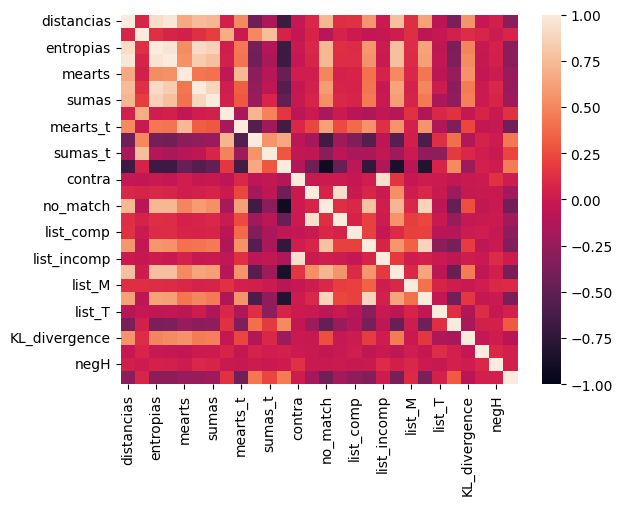

In [148]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [149]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,1.000000,0.073685,0.922306,0.972109,0.658321,0.754496,0.722219,0.044628,0.513249,-0.440830,...,-0.002841,0.767201,0.117843,0.619294,-0.079902,-0.374003,0.557441,-0.033269,0.031432,-0.311429
entropia_total,0.073685,1.000000,0.128389,0.064578,0.041460,0.127134,0.191606,0.677205,-0.012829,0.505977,...,-0.025052,0.012690,0.124304,-0.067585,-0.033998,0.045180,0.110827,0.073998,0.004959,0.076176
entropias,0.922306,0.128389,1.000000,0.958850,0.531005,0.899202,0.863431,0.026987,0.429844,-0.399353,...,0.001450,0.766460,0.113331,0.628259,-0.058046,-0.373287,0.488779,-0.017698,0.053972,-0.303298
mutinf,0.972109,0.064578,0.958850,1.000000,0.540691,0.833596,0.771584,0.041811,0.416550,-0.428230,...,-0.012993,0.770267,0.105266,0.616598,-0.044807,-0.366821,0.520190,-0.029875,0.043780,-0.300830
mearts,0.658321,0.041460,0.531005,0.540691,1.000000,0.426005,0.398846,-0.051678,0.738250,-0.301984,...,0.055089,0.510247,0.091639,0.425791,-0.065782,-0.246527,0.547916,-0.042594,0.005689,-0.238055
max_info,0.754496,0.127134,0.899202,0.833596,0.426005,1.000000,0.885003,0.019927,0.324505,-0.259115,...,-0.019388,0.638446,0.060723,0.492649,0.005058,-0.294122,0.446484,-0.007506,0.080037,-0.236879
sumas,0.722219,0.191606,0.863431,0.771584,0.398846,0.885003,1.000000,0.046052,0.302852,-0.228209,...,-0.014169,0.602071,0.069487,0.442829,-0.140913,-0.273572,0.464553,-0.000306,0.065388,-0.209880
mutinf_t,0.044628,0.677205,0.026987,0.041811,-0.051678,0.019927,0.046052,1.000000,-0.168912,0.717906,...,-0.054393,-0.094277,0.140210,-0.139956,0.080685,0.134337,-0.025316,0.067396,-0.008617,0.140247
mearts_t,0.513249,-0.012829,0.429844,0.416550,0.738250,0.324505,0.302852,-0.168912,1.000000,-0.560308,...,0.127522,0.557457,0.045396,0.560927,-0.125613,-0.358525,0.231151,-0.042431,-0.018753,-0.417221
max_info_t,-0.440830,0.505977,-0.399353,-0.428230,-0.301984,-0.259115,-0.228209,0.717906,-0.560308,1.000000,...,-0.075683,-0.534107,0.032974,-0.594141,0.120425,0.391704,-0.117906,0.062117,0.002037,0.431756


In [150]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropia_total,0.073685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropias,0.922306,0.128389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,0.972109,0.064578,0.958850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mearts,0.658321,0.041460,0.531005,0.540691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info,0.754496,0.127134,0.899202,0.833596,0.426005,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
sumas,0.722219,0.191606,0.863431,0.771584,0.398846,0.885003,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf_t,0.044628,0.677205,0.026987,0.041811,-0.051678,0.019927,0.046052,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mearts_t,0.513249,-0.012829,0.429844,0.416550,0.738250,0.324505,0.302852,-0.168912,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info_t,-0.440830,0.505977,-0.399353,-0.428230,-0.301984,-0.259115,-0.228209,0.717906,-0.560308,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [151]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropias distancias 0.9223061637194091
mutinf distancias 0.9721089291714387
mutinf entropias 0.9588502238474144
max_info distancias 0.7544960093172742
max_info entropias 0.8992020466139171
max_info mutinf 0.8335958410675143
sumas distancias 0.7222190977117504
sumas entropias 0.8634313521450101
sumas mutinf 0.7715836969760227
sumas max_info 0.8850033818222844
mearts_t mearts 0.7382498777854126
max_info_t mutinf_t 0.7179060533365124
sumas_t entropia_total 0.758797821156614
no_match distancias 0.7284462061521157
no_match entropias 0.7337702961084664
no_match mutinf 0.7324261153951558
rel_conceptuales neutral 0.9318332004600854
diferencias no_match 0.7879494675155628
list_incomp contra 0.9407767115533564
entropia_relaciones distancias 0.7672006700856863
entropia_relaciones entropias 0.7664602059312438
entropia_relaciones mutinf 0.770266617870517
entropia_relaciones no_match 0.7211137297884301
list_m no_match 0.8749619042754587
list_m diferencias 0.8760095777969238


In [152]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

no_match entail -0.9162971574090112
diferencias entail -0.7339625319137093
entropia_relaciones entail -0.8666479507587243
list_m entail -0.8144842118970768


In [153]:
# Checar variables colineales
#sns.relplot(data=train_m, x="mutinf", y="sumas")

In [154]:
# train=train.drop(["entail","list_m"],axis=1)

In [155]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [156]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [157]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [158]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

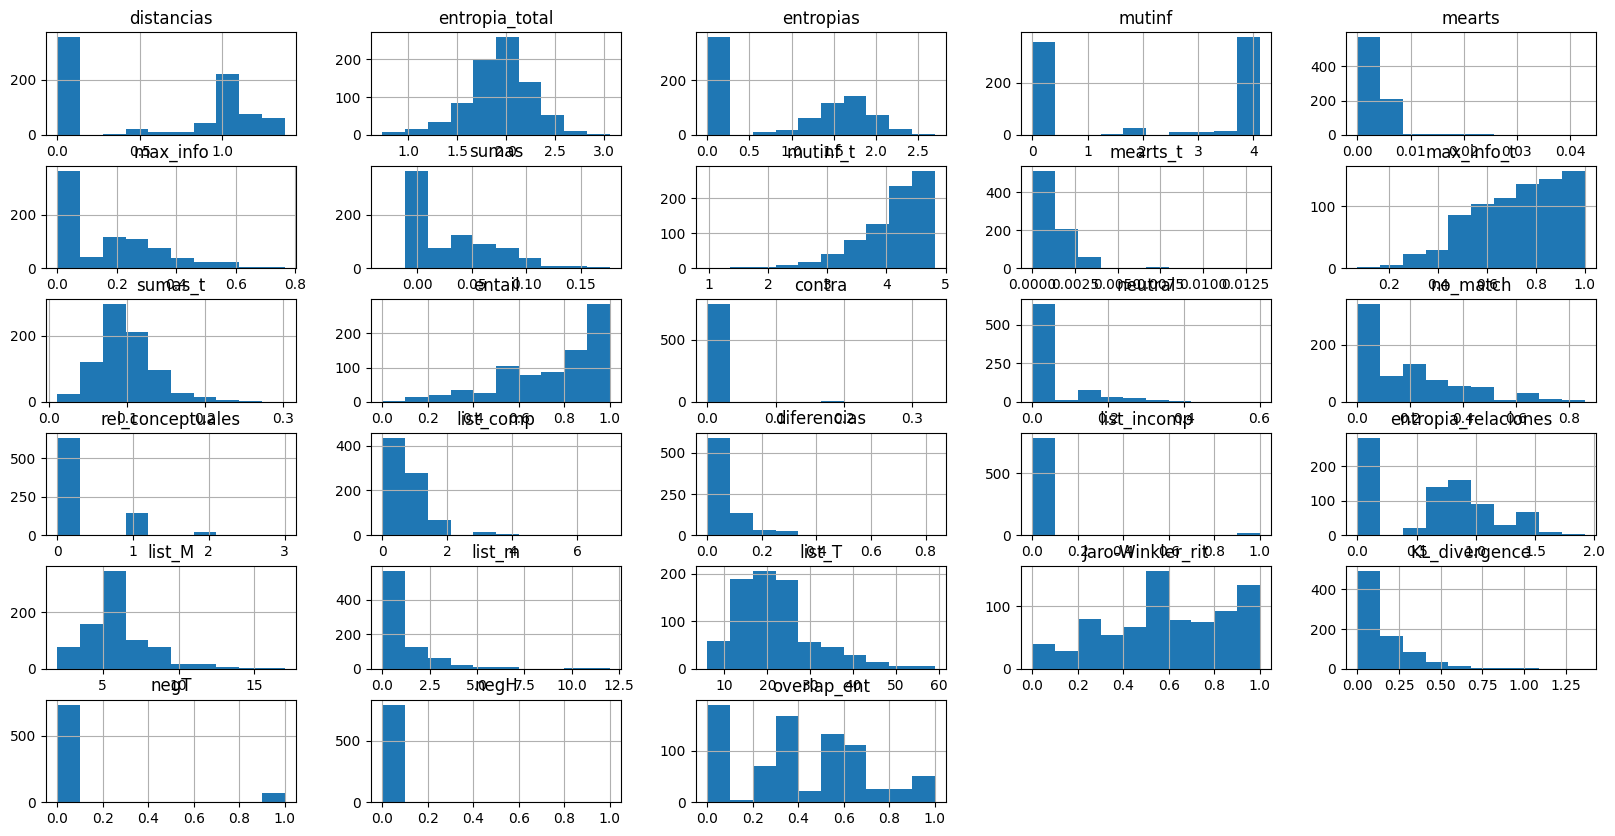

In [159]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [160]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4h/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4h/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [161]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,0,24,0.400000,0.000000,0,,0,,0.666667,YES
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,0,24,0.800000,0.000000,0,,0,,0.333333,YES
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,0,14,0.500000,0.000000,0,,0,,0.666667,YES
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,0,20,0.666667,0.000000,0,,0,,1.000000,YES
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,1,20,0.000000,0.597443,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,2.198445,0.000000,0.000000,0.000000,0.000000,0.000000,4.383406,0.001461,0.852755,...,0,19,0.400000,0.000000,1,rush,0,,0.500000,YES
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,0,25,0.666667,0.000000,0,,0,,0.333333,NO
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,0,24,0.000000,0.000000,0,,0,,0.666667,UNKNOWN
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,1,10,0.500000,0.339799,0,,0,,0.666667,UNKNOWN


In [162]:
# test["mutinf"]=test["mutinf"]/test["mutinf_t"]
# test["max_info"]=test["max_info"]/test["max_info_t"]
# #train["mearts"]=train["mearts"]/train["mearts_t"]
# #train["entropias"]=train["entropias"]/train["entropia_total"]
# test["sumas"]=test["sumas"]/test["sumas_t"]
# test["list_m"]=test["list_m"]/test["list_M"]
# test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
#                   "mearts_t","sumas_t","list_M"],axis=1)
# test["mearts"]=test["mearts"]*test["distancias"]
# test=test.drop(["distancias","list_incomp","negH","max_info",'contra','neutral','list_comp','list_T','negT','entail','list_m'],axis=1)

In [163]:
test=test.drop(["verbT","verbH"],axis=1)

In [164]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [165]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [166]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [167]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.32252207, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.55098802, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.72463906, 0.64088255, 0.80744617, ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.48722652, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.54450479, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.72464186, 0.61545887, 0.64046162, ..., 0.        , 0.        ,
        0.66666667]])

In [168]:
X_train.shape

(800, 28)

In [169]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [170]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [171]:
model.decision_function(X_train)

array([ 9.38535595e-01,  1.24427603e+00,  6.26730253e-01,  1.58513643e+00,
        6.26596417e-01,  1.19640298e+00,  9.06323602e-01, -1.11494905e+00,
        1.09161274e+00, -1.43923253e+00, -6.68258440e-02,  8.83248267e-01,
        1.28382373e+00, -5.24588413e-02, -8.01212717e-01,  9.87569445e-01,
        8.70831757e-01,  5.62652716e-01, -1.30837343e+00,  1.90106702e-01,
        1.21339097e+00, -2.22158381e-01,  6.31758801e-01,  1.21368087e+00,
        9.73490764e-01,  1.21144865e-01,  9.41814210e-01, -9.67111464e-01,
        6.87126300e-01, -1.87573175e-01,  1.10368880e+00,  3.59117489e-01,
        7.33198072e-01,  1.01770883e+00, -5.96318018e-02,  3.56070972e-01,
        1.24539737e+00,  6.15302540e-01,  3.11320524e-01,  1.41041641e+00,
        1.02005417e+00, -6.54175752e-02,  8.19146996e-01,  4.94260649e-01,
       -7.01467132e-01,  1.98562015e-01,  5.99700542e-01,  1.26413616e+00,
        5.50621450e-01,  8.94292010e-01, -6.29323591e-01,  8.83834927e-01,
       -2.00858634e+00,  

In [172]:
labels=train.columns[:-1]
labels

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [173]:
model.classes_

array([0, 1])

In [174]:
model.coef_[0]

array([ 0.12461055, -0.35503893,  0.03667892,  0.61160742, -0.63225558,
        0.36595482,  0.71052725, -0.59937195, -0.74737265,  0.84376075,
        0.17301072,  1.74291201, -0.01339526,  0.1900402 , -2.16074608,
        0.35223649, -0.04537717, -0.08093465,  0.17264918, -1.04498824,
       -0.41743729, -0.92677136,  0.69706039,  0.82344717, -0.81604863,
       -0.25107185, -0.46713523,  0.55016818])

In [175]:
coeficientes=model.coef_[0]

In [176]:
coeficientes

array([ 0.12461055, -0.35503893,  0.03667892,  0.61160742, -0.63225558,
        0.36595482,  0.71052725, -0.59937195, -0.74737265,  0.84376075,
        0.17301072,  1.74291201, -0.01339526,  0.1900402 , -2.16074608,
        0.35223649, -0.04537717, -0.08093465,  0.17264918, -1.04498824,
       -0.41743729, -0.92677136,  0.69706039,  0.82344717, -0.81604863,
       -0.25107185, -0.46713523,  0.55016818])

In [177]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  11 entail 14 no_match


In [178]:
n_columns=train.shape[1]-1

In [179]:
n_columns

28

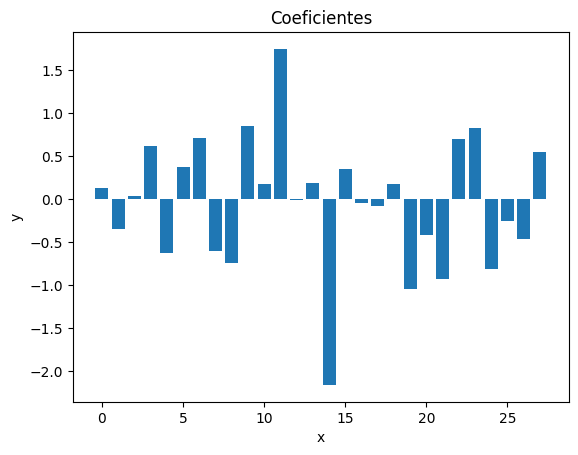

In [180]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [181]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.75516378, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.70031418, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.5972915 , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.61881135, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.94840642, 0.59797602, 0.32732776, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.85923413, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [182]:
X_test.shape

(800, 28)

In [183]:
predictions = model.predict(X_test)

In [184]:
predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [185]:
test["predicciones"]=predictions
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,predicciones
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,5,0,24,0.400000,0.000000,0,0,0.666667,YES,1
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,5,0,24,0.800000,0.000000,0,0,0.333333,YES,1
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,4,0,14,0.500000,0.000000,0,0,0.666667,YES,1
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,6,0,20,0.666667,0.000000,0,0,1.000000,YES,1
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,4,1,20,0.000000,0.597443,0,0,1.000000,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,2.198445,0.000000,0.000000,0.000000,0.000000,0.000000,4.383406,0.001461,0.852755,...,5,0,19,0.400000,0.000000,1,0,0.500000,YES,1
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,6,0,25,0.666667,0.000000,0,0,0.333333,NO,1
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,3,0,24,0.000000,0.000000,0,0,0.666667,UNKNOWN,1
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,4,1,10,0.500000,0.339799,0,0,0.666667,UNKNOWN,0


In [186]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,predicciones
32,0.999965,1.657144,0.836641,3.823568e+00,0.005280,0.096198,0.029696,3.325708,0.000982,0.524050,...,4,1,15,0.500000,0.299255,0,0,0.666667,YES,0
42,0.999949,1.803001,0.000000,1.111111e-12,0.038242,0.000000,0.000000,3.669758,0.006290,0.678677,...,7,1,19,0.428571,0.826464,0,0,0.500000,YES,0
67,1.000014,1.954655,1.190526,3.932898e+00,0.004087,0.140466,0.028140,4.363621,0.001476,0.570233,...,4,2,18,0.500000,0.222886,0,0,0.333333,YES,0
68,0.999965,0.980013,1.094914,3.925423e+00,0.006622,0.105222,-0.000169,3.628157,0.000944,0.621044,...,5,1,14,0.400000,0.204611,0,0,0.333333,YES,0
81,1.309395,2.588685,1.413582,3.899186e+00,0.006312,0.141814,0.025370,4.179236,0.001347,0.754804,...,7,2,12,0.428571,0.511539,0,0,0.666667,YES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,0.999956,1.956179,1.378783,3.947298e+00,0.004199,0.160785,0.039661,3.428392,0.001363,0.503765,...,5,1,7,0.000000,0.367685,0,0,0.666667,YES,0
729,0.999955,2.358713,0.773228,3.692578e+00,0.006888,0.148445,0.024391,4.378658,0.001643,0.740177,...,5,1,13,0.800000,0.896728,0,0,0.500000,YES,0
738,0.974583,2.125113,1.391836,3.894717e+00,0.004092,0.347146,0.081756,4.331746,0.001442,0.726598,...,7,2,12,0.714286,0.319283,0,0,0.500000,YES,0
743,0.999988,1.787509,1.521815,3.932902e+00,0.004963,0.223007,0.037520,4.405601,0.001533,0.697396,...,17,6,16,0.235294,0.081797,0,0,0.375000,YES,0


In [187]:
print(confusion_matrix(y_test, predictions))

[[218 172]
 [ 86 324]]


In [188]:
# [[225 165]
#  [ 92 318]]
# [[236 154]
#  [106 304]]
# [[239 151]
#  [124 286]]
# acccuracy:  0.66
# precision:  0.65
# recall 0.7
# f1_score:  0.68
# matthews_score:  0.31
# acccuracy:  0.68
# precision:  0.66
# recall 0.74
# f1_score:  0.7
# matthews_score:  0.35

In [189]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.68
precision:  0.65
recall 0.79
f1_score:  0.72
matthews_score:  0.36


In [190]:
# acccuracy:  0.68
# precision:  0.65
# recall 0.79
# f1_score:  0.71
# matthews_score:  0.35

In [191]:
X_train.shape

(800, 28)

In [192]:
X_test.shape

(800, 28)

In [193]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [194]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [195]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.710000 (0.111490)
Logistic Regression Precision:: 0.710000 (0.113391)
Logistic Regression Recall:: 0.800000 (0.067492)
Logistic Regression F1-score:: 0.740000 (0.070975)


In [197]:
# Logistic Regression Acurracy:: 0.710000 (0.106147)
# Logistic Regression Precision:: 0.720000 (0.118139)
# Logistic Regression Recall:: 0.790000 (0.081470)
# Logistic Regression F1-score:: 0.740000 (0.066817)

In [198]:
# Logistic Regression Acurracy:: 0.710000 (0.114844)
# Logistic Regression Precision:: 0.720000 (0.121810)
# Logistic Regression Recall:: 0.800000 (0.084588)
# Logistic Regression F1-score:: 0.740000 (0.073147

In [199]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.115047)
Logistic Regression Recall:: 0.710000 (0.111490)
Logistic Regression F1-score:: 0.690000 (0.134832)


In [200]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.115004)
Logistic Regression Recall:: 0.700000 (0.116482)
Logistic Regression F1-score:: 0.690000 (0.137623)


In [201]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.111490)
Logistic Regression Recall:: 0.710000 (0.111490)
Logistic Regression F1-score:: 0.710000 (0.111490)


In [202]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.400000 (0.246752)


In [203]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [56]:
#linear_model

In [81]:
#model = LogisticRegression()
#model.fit(X_train,y_train)

In [204]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict,labels=[1,0]))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63       390
           1       0.65      0.79      0.72       410

    accuracy                           0.68       800
   macro avg       0.69      0.67      0.67       800
weighted avg       0.68      0.68      0.67       800

[[324  86]
 [172 218]]


In [ ]:
#  precision    recall  f1-score   support

#            0       0.73      0.51      0.60       390
#            1       0.64      0.82      0.72       410

#     accuracy                           0.67       800
#    macro avg       0.68      0.66      0.66       800
# weighted avg       0.68      0.67      0.66       800

# [[338  72]
#  [193 197]]

In [ ]:
#              precision    recall  f1-score   support

#            0       0.71      0.56      0.63       390
#            1       0.65      0.79      0.71       410

#     accuracy                           0.68       800
#    macro avg       0.68      0.67      0.67       800
# weighted avg       0.68      0.68      0.67       800

In [ ]:
#    precision    recall  f1-score   support

#            0       0.73      0.54      0.62       390
#            1       0.65      0.81      0.72       410

#     accuracy                           0.68       800
#    macro avg       0.69      0.67      0.67       800
# weighted avg       0.69      0.68      0.67       800

In [ ]:
# precision    recall  f1-score   support

#            0       0.69      0.61      0.64       390
#            1       0.66      0.74      0.70       410

#     accuracy                           0.68       800
#    macro avg       0.68      0.67      0.67       800
# weighted avg       0.68      0.68      0.67       800

In [277]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [278]:
test.columns[:-2]

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'no_match', 'diferencias',
       'entropia_relaciones', 'Jaro-Winkler_rit', 'overlap_ent'],
      dtype='object')

In [279]:
explainer.expected_value

-0.19671023739858115

In [280]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.4       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.32312239, 0.2821871 , 0.17518758, ..., 0.42211679, 0.5       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]])

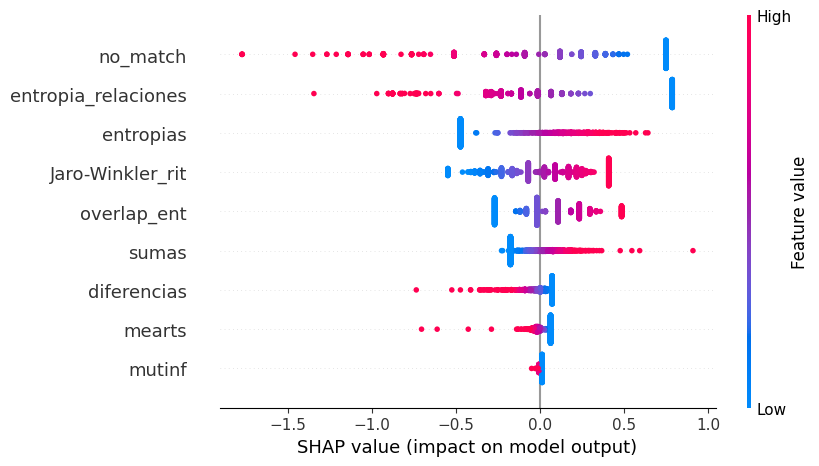

In [281]:
shap.plots.beeswarm(shap_values)

[0.54671232 0.34684775 0.12872415 0.15206629 0.2        0.05454545
 0.37562701 0.8        0.33333333] 0 1


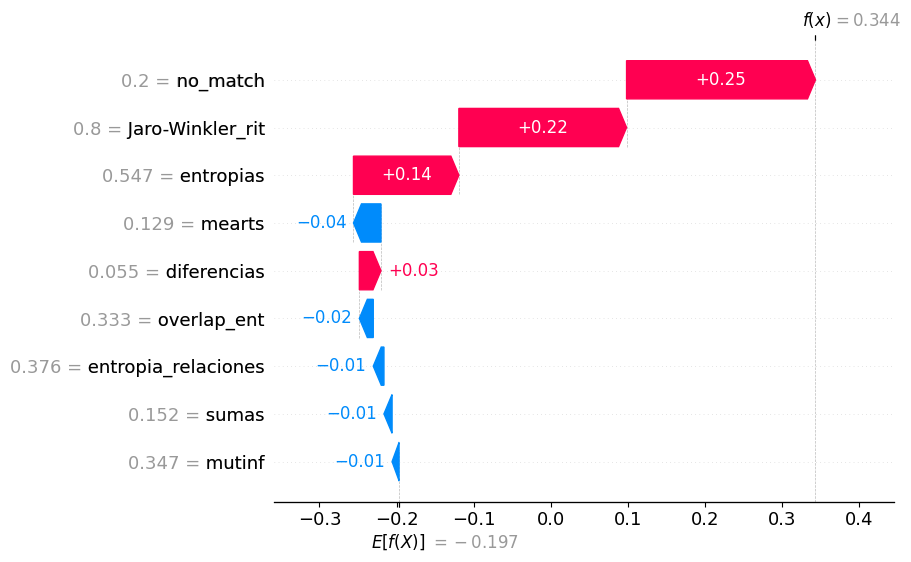

In [282]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [283]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.         1.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

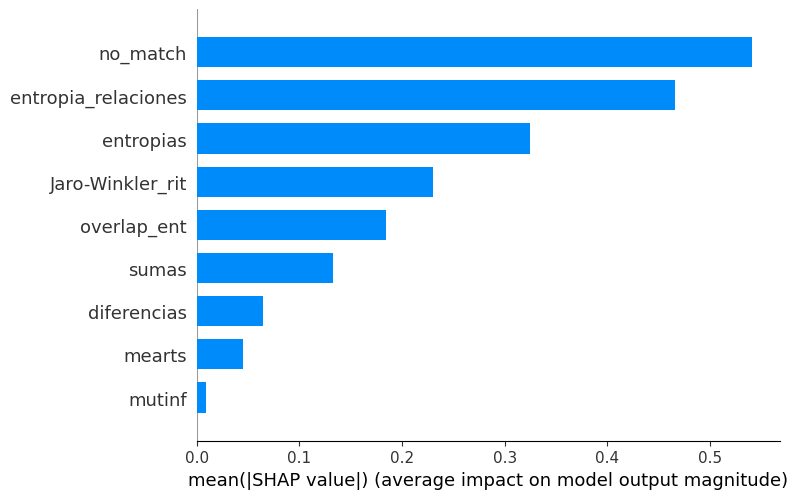

In [284]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

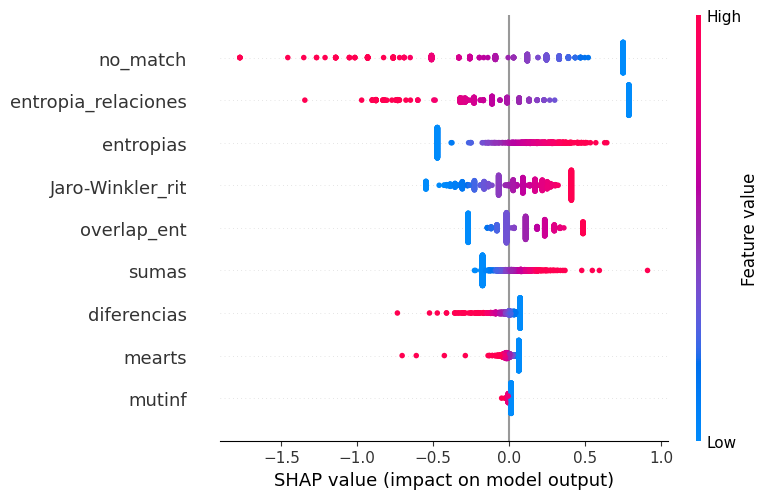

In [291]:
shap.summary_plot(shap_values[:,:,0])

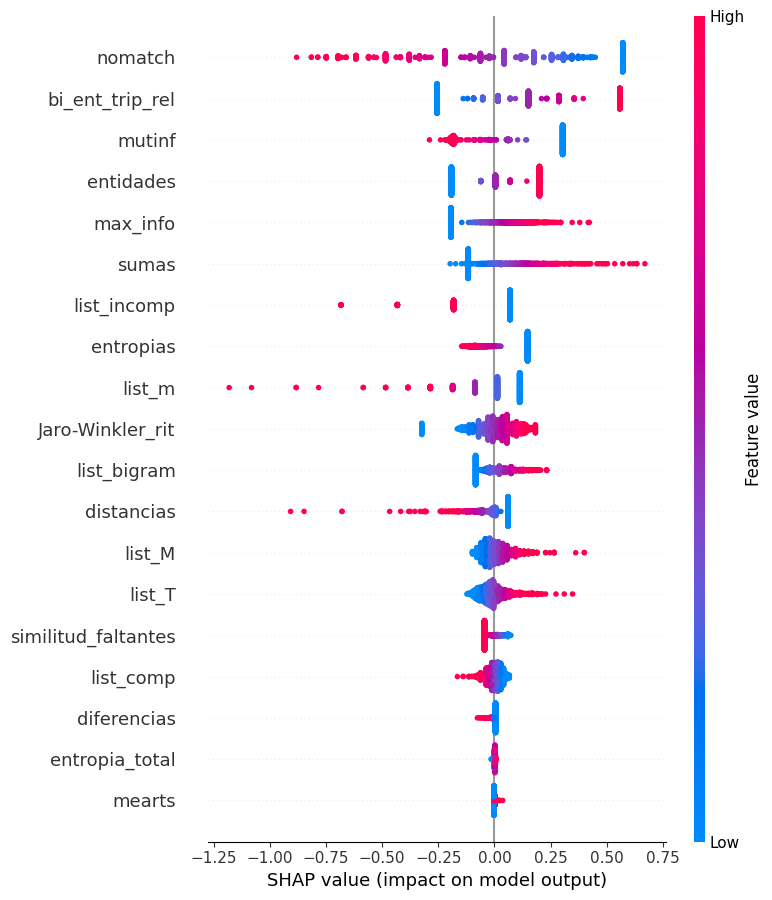

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

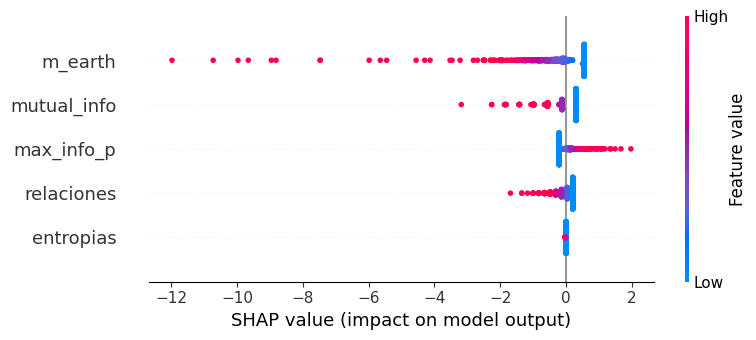

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [197]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [204]:
clf = DecisionTreeClassifier(splitter="random",criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [205]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.65
precision:  0.64
recall 0.72
f1_score:  0.68
matthews_score:  0.3


In [206]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [207]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.620000 (0.038039)
DecisionTree: 0.630000 (0.036153)
DecisionTree: 0.680000 (0.060250)
DecisionTree: 0.650000 (0.030989)


In [202]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[256, 134],
       [183, 227]])

Profundidad del árbol: 22
Número de nodos terminales: 278


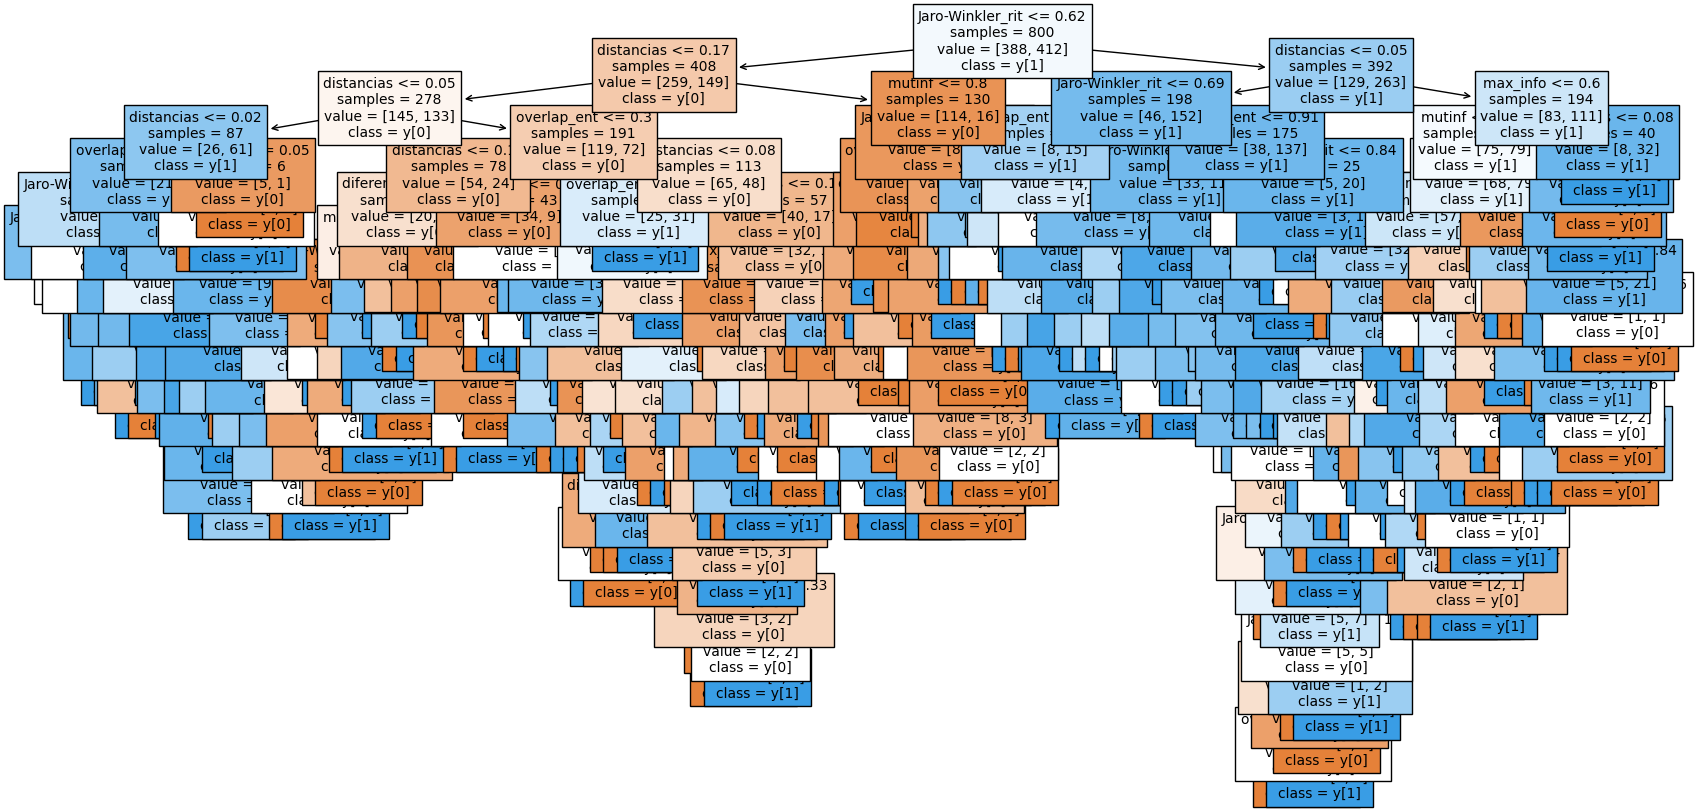

In [203]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )